# Demonstration of HuggingFace Transformer APIs

In [ ]:
!pip install transformers

## Text classification

Text Classification API does a sentiment analysis based on the text and also gives the confidence of that sentiment (score)

In [2]:
from transformers import pipeline

text_classification = pipeline("text-classification")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [6]:
text_classification('Watching anime fills my heart with joy and brings a smile to my face every time!')

[{'label': 'POSITIVE', 'score': 0.9998703002929688}]

##Named entity recognition

named entity recognition (NER): label a token according to an entity category like organization, person, location or date.

In [20]:
classifier = pipeline(task="ner")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

In [21]:
ner = classifier("MS Dhoni led CSK to manny IPL victories.")
ner = [
    {
        "entity": ne["entity"],
        "score": round(ne["score"], 4),
        "index": ne["index"],
        "word": ne["word"],
        "start": ne["start"],
        "end": ne["end"],
    }
    for ne in ner
]
ner

[{'entity': 'I-PER',
  'score': 0.9965,
  'index': 1,
  'word': 'MS',
  'start': 0,
  'end': 2},
 {'entity': 'I-PER',
  'score': 0.9992,
  'index': 2,
  'word': 'D',
  'start': 3,
  'end': 4},
 {'entity': 'I-PER',
  'score': 0.9646,
  'index': 3,
  'word': '##hon',
  'start': 4,
  'end': 7},
 {'entity': 'I-PER',
  'score': 0.9712,
  'index': 4,
  'word': '##i',
  'start': 7,
  'end': 8},
 {'entity': 'I-ORG',
  'score': 0.9996,
  'index': 6,
  'word': 'CS',
  'start': 13,
  'end': 15},
 {'entity': 'I-ORG',
  'score': 0.9987,
  'index': 7,
  'word': '##K',
  'start': 15,
  'end': 16},
 {'entity': 'I-MISC',
  'score': 0.3541,
  'index': 11,
  'word': 'IP',
  'start': 26,
  'end': 28}]

##Question answering

Question answering is another token-level task that returns an answer to a question, sometimes with context (open-domain) and other times without context (closed-domain). This task happens whenever we ask a virtual assistant something like whether a restaurant is open. It can also provide customer or technical support and help search engines retrieve the relevant information you’re asking for.

In [16]:
question_answer = pipeline('question-answering')

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [19]:
context = "Tom was excited about his upcoming camping trip with his family. He had been eagerly waiting for this day for weeks. \
As the sun rose on the morning of the trip, Tom hurriedly packed his backpack with all the essentials: a tent, sleeping bag, flashlight, and some snacks. \
His family arrived soon after, and they set off on their adventure. They reached the campsite in the early afternoon. \
Tom's parents helped him set up the tent while his little sister, Emily, explored the area around them. \
Once everything was set up, they gathered wood for a campfire and cooked hot dogs and marshmallows for dinner. \
As night fell, the stars came out, twinkling brightly in the sky. Tom and his family sat around the campfire, telling stories and sharing laughs. \
They roasted marshmallows until they were golden brown and enjoyed the warmth of the fire on the cool night."

answer = question_answer(question = 'What did Tom pack in his backpack for the camping trip?', context = context)
print(
    f"score: {round(answer['score'], 4)}, start: {answer['start']}, end: {answer['end']}, answer: {answer['answer']}"
)

score: 0.5812, start: 220, end: 269, answer: a tent, sleeping bag, flashlight, and some snacks


## Text summarization

Text summarization is the process of distilling the main points or key information from a longer piece of text into a shorter, coherent version while preserving the essential meaning.

In [24]:
summarization = pipeline(model="facebook/bart-large-cnn")

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [26]:
paragraph = "Tom was excited about his upcoming camping trip with his family. He had been eagerly waiting for this day for weeks. \
As the sun rose on the morning of the trip, Tom hurriedly packed his backpack with all the essentials: a tent, sleeping bag, flashlight, and some snacks. \
His family arrived soon after, and they set off on their adventure. They reached the campsite in the early afternoon. \
Tom's parents helped him set up the tent while his little sister, Emily, explored the area around them. \
Once everything was set up, they gathered wood for a campfire and cooked hot dogs and marshmallows for dinner. \
As night fell, the stars came out, twinkling brightly in the sky. Tom and his family sat around the campfire, telling stories and sharing laughs. \
They roasted marshmallows until they were golden brown and enjoyed the warmth of the fire on the cool night."


summarization(paragraph, min_length = 30, max_length = 45)

[{'summary_text': 'Tom was excited about his upcoming camping trip with his family. They gathered wood for a campfire and cooked hot dogs and marshmallows for dinner. Tom and his family sat around the campfire, telling stories'}]

## Translation


In [27]:
Chinese_to_english = pipeline(model="Helsinki-NLP/opus-mt-zh-en")

config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/805k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/807k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.62M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [ ]:
!pip install sacremoses

In [32]:
Chinese_to_english("嘿！我是悟空")

[{'translation_text': "Hey, I'm Goku."}]

## Zero-shot classification

Zero-shot classification in natural language processing (NLP) refers to the task of classifying text into predefined categories or labels without any direct training examples for those categories.

In [37]:
Zero_Shot_Classification = pipeline("zero-shot-classification", model="knowledgator/comprehend_it-base")

config.json:   0%|          | 0.00/1.06k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/738M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/8.66M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

In [39]:
to_classify = "Let's fight aiming to become the most free willed man on this Sea."
possible_labels = ['sadist', 'peaceful', 'goal-oriented']
Zero_Shot_Classification(to_classify, possible_labels)

{'sequence': "Let's fight aiming to become the most free willed man on this Sea.",
 'labels': ['goal-oriented', 'sadist', 'peaceful'],
 'scores': [0.8928725123405457, 0.08573414385318756, 0.021393336355686188]}

## Computer vision


In [22]:
image_classifier = pipeline(model="google/vit-base-patch16-224")

config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

In [23]:
image_classifier("/content/cat_superres_with_ort.jpg")

[{'label': 'Egyptian cat', 'score': 0.48705756664276123},
 {'label': 'tabby, tabby cat', 'score': 0.19790133833885193},
 {'label': 'tiger cat', 'score': 0.16059570014476776},
 {'label': 'lynx, catamount', 'score': 0.042576294392347336},
 {'label': 'Persian cat', 'score': 0.0060039241798222065}]

Image used for classification task.

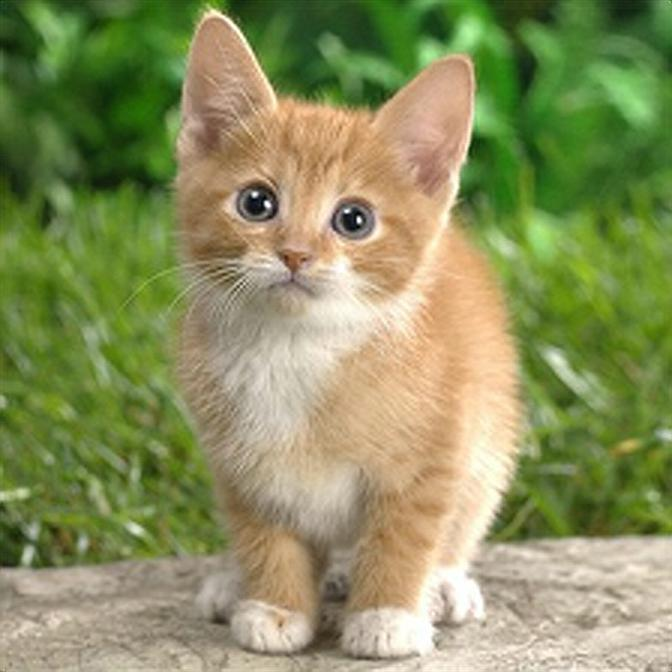

## Audio

Set of possible emotions as per the model:

['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

In [34]:
Audio_Classifier = pipeline(model="ehcalabres/wav2vec2-lg-xlsr-en-speech-emotion-recognition")

pytorch_model.bin:   0%|          | 0.00/1.27G [00:00<?, ?B/s]

Some weights of the model checkpoint at ehcalabres/wav2vec2-lg-xlsr-en-speech-emotion-recognition were not used when initializing Wav2Vec2ForSequenceClassification: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.output.bias', 'classifier.output.weight', 'wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForSequenceClassification were not initialized from the model checkpoint at ehcalabres/wav2vec2-lg-xlsr-e

preprocessor_config.json:   0%|          | 0.00/214 [00:00<?, ?B/s]

In [35]:
Audio_Classifier('/content/wake_up_to_reality.mp3')

[{'score': 0.13553977012634277, 'label': 'happy'},
 {'score': 0.13091181218624115, 'label': 'angry'},
 {'score': 0.1293492317199707, 'label': 'neutral'},
 {'score': 0.12720990180969238, 'label': 'surprised'},
 {'score': 0.12440221756696701, 'label': 'sad'}]

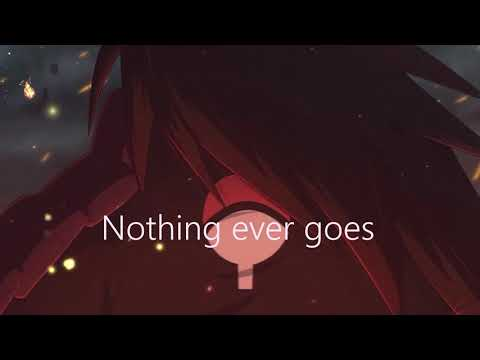

In [36]:
#Audio Used for
from IPython.display import YouTubeVideo
#https://youtu.be/a-KXciUzJXM?feature=shared
YouTubeVideo('a-KXciUzJXM')

## Table QA

The goal of Table QA is to enable machines to comprehend and analyze structured data presented in tabular form, similar to how Question Answering tasks operate on unstructured text data. This task is particularly useful in scenarios where data is organized in tables, such as databases, spreadsheets, or other structured data sources.

In [13]:
tableqA = pipeline(model="google/tapas-base-finetuned-wtq")

config.json:   0%|          | 0.00/1.66k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/490 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/262k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/154 [00:00<?, ?B/s]

In [14]:
Anime_Database = {
    "Anime Title": ["One Piece", "Dragon Ball", "Naruto"],
    "Episodes": ["1097", "800", "720"],
    "Creator": ["Oda", "Toriyama", "Kishimoto"],
    "Main Character": ["Luffy", "Goku", "Naruto"],
}
tableqA(query="WHich anime has the highest number of Episodes", table=Anime_Database)

{'answer': 'One Piece',
 'coordinates': [(0, 0)],
 'cells': ['One Piece'],
 'aggregator': 'NONE'}